In [155]:
import numpy as np
import matplotlib.pyplot as plt
import time

def calcul_puissance_nul(x,d):
    a=1
    while d != 0 : 
        a = a*x
        d -= 1
    return a

def calcul_puissance(x,d):
    if d == 0 :
        return 1
    elif d == 1 : 
        return x
    elif d%2== 0 :
        x = calcul_puissance((x**2), d/2)
    else : 
        v = calcul_puissance(x, d-1)
        x = (v*x)
    return x

def exponentiation(x,d,n):
    if d == 0 :
        return 1
    elif d == 1 : 
        return x%n
    elif d%2== 0 :
        x = exponentiation((x**2)%n, d/2,n)
    else : 
        v = exponentiation(x%n, d-1,n)
        x = (v*x)%n
    return x
    
def chiffrement_dechiffrement(M,e,n):    
    M_exp_e = exponentiation(M, e,n)
    M_crypte = M_exp_e%n
    return M_crypte

def test_primalite(n):
    for i in range(2,int(n**(1/2))+1):
        if n%2 == 0:
            return False
        elif n%i ==0 :
            return False
    return True
    
def test_copremier(a,b):
    if xgcd(a,b)[0] == 1 :
        return True
    else :
        return False
    
def creation_couple(e,p,q):
    
    if not test_primalite(p) or not test_primalite(q):
        print('p ou q nest pas premier !')
        return None
    
    n = p*q
    phi = euler_phi(n)
    
    if not test_copremier(e,phi):
        print('e non copremier avec phi !')
        return None
    
    d = inverse_mod(e,phi)
    
    return {"public" : (n,e), 'prive' : d}
   
def creation_premier(t):
    a = randint(2**(t-1)-1,2**t)
    return next_prime(a)

def comparaison_calcul_puissance():
    X = np.random.randint(500,1000)
    D = np.array([3**i for i in range(1,12)])
    delta1 = []
    delta2 = []
    for d in D :
        t0 = time.time()
        calcul_puissance(X, d)
        delta1.append(time.time() - t0)
        
        t1 = time.time()
        calcul_puissance_nul(X, d)
        delta2.append(time.time() - t1)
        
    delta1 = np.array(delta1)
    delta2 = np.array(delta2)
    
    plt.title('Temps de calcul en fonction de la puissance')
    plt.plot(delta1,D,'ro--',label = 'Calcul puissance rapide (exponentiation)',)
    plt.plot(delta2,D,'bo--', label = 'Calcul puissance lent')
    plt.xlabel('Temps (en sec)')
    plt.ylabel('Puissance')
    plt.xscale('log')
    plt.legend()
    plt.show()
    
    return None

def comparaison_cle_prive():
    liste_bits = [16,20,24,28,32,36,40,44,48,52,56]
    message = 123456789
    delta = []
    for bit in liste_bits :
        p,q = creation_premier(bit),creation_premier(bit)
        n = p*q
        e = 65537
        
        t0 = time.time()
        dico = creation_couple(e,p,q)
        delta.append(time.time() - t0)
    
    plt.title('Temps de calcul de la clé privée en fonction du nombre de bits')
    plt.plot(delta,liste_bits)
    plt.xlabel('Temps (en sec)')
    plt.ylabel('Puissance')
    plt.xscale('log')
    plt.show()
    
    return None
    
        

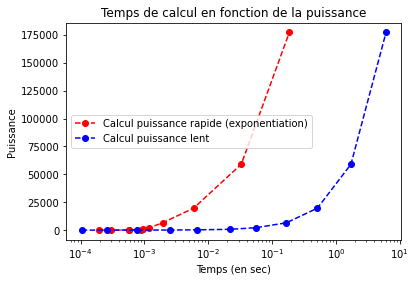

In [106]:
comparaison_calcul_puissance()

In [144]:
p,q = creation_premier(50),creation_premier(50)

In [145]:
n = p*q
n

342627481470646481045407160423

In [146]:
test_copremier((p-1)*(q-1),65537)

True

In [147]:
test_primalite(65537)
e = 65537

In [148]:
dico = creation_couple(e,p,q)
print(dico)

{'public': (342627481470646481045407160423, 65537), 'prive': 317951318195831909001022151753}


In [149]:
d = dico['prive']
print(d)

317951318195831909001022151753


In [150]:
m = chiffrement_dechiffrement(1112357,e,n)
print(m)

103739867102903778870672290202


In [151]:
x = chiffrement_dechiffrement(m,d,n)
print(x)

1112357


In [152]:
s = chiffrement_dechiffrement(11123,d,n)
print(s)
s_d = chiffrement_dechiffrement(s,e,n)
print(s_d)

94557599826327920647223455898
11123


In [ ]:
comparaison_cle_prive()